In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# read the AggriWebb dataset
df = pd.read_csv('tsdm.csv')

# get info of all 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3691 entries, 0 to 3690
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PADDOCK_ID          3691 non-null   object 
 1   OBSERVATION_DATE    3691 non-null   object 
 2   TSDM                3691 non-null   float64
 3   15D_AVG_DAILY_RAIN  3691 non-null   float64
 4   15D_AVG_MAX_TEMP    3691 non-null   float64
 5   15D_AVG_MIN_TEMP    3691 non-null   float64
 6   15D_AVG_RH_TMAX     3691 non-null   float64
 7   15D_AVG_RH_TMIN     3691 non-null   float64
 8   15D_AVG_EVAP_SYN    3691 non-null   float64
 9   15D_AVG_RADIATION   3691 non-null   float64
dtypes: float64(8), object(2)
memory usage: 288.5+ KB


In [2]:
# Sort by paddock and date
df = df.sort_values(['PADDOCK_ID', 'OBSERVATION_DATE'])


In [3]:
df['PADDOCK_ID'].nunique()

19

In [4]:
df['PADDOCK_ID'].value_counts()

PADDOCK_ID
352a2a92802487c32fa051f18f0fd7c53ef4b517d562a78369c7f8c679c6ac60    195
ab55bcd82ea3bedbf39af4eaf9b2c6387ce1d5345fa552d25a7357c10cb689ba    195
e59f403db9fb2286ae2a0838ccdc0bcf703b1cf04b933261f4ead66c3d65dda8    195
deb009be1806257c59d7964da7bc06206fe74b94d01d308939079b3d57141a26    195
d1a2be8f6307b3c2d1252c096b5efcaf7059b3e6ded59c01ea235451af0556e7    195
cabef0e85bd2e0922159406f5ad08e17006d466c83d785d06fa7f2c8555acc44    195
44f7088d1e8d42e054cd25c74d4bafee2059788c5ac8273a41af5d197c187ff8    195
ad87a9f82ee7fb99ddfd4f63e8065925e8411b9e904cd6d4729de5cdee217fa8    195
a649402b3679b6bc9ef3556484c74b3b212db6e121e11d14b530c877411de9a9    195
8714b98a7839f7e8e139a79e8dbff0ced6b5f68c476d58cfa80c4fee1b02f084    195
8191f02814bdec2922fd5287d8e55410e0fd78e2b195b47bdb05830ad71cb0cb    195
f4bfb0920671ab818ebac30a7945b3a1ae8e75954ae03fb6f5fef97822ad0883    195
b993487b23eecfd37c2c8de5b2816bb7b8d0ff15c5bc0b572533a5a6bd7bf4ae    193
6b294fede7561d76c0b2592b9cfc8c131e8400860df9edc319981

In [5]:
df = df[df['PADDOCK_ID'] != 'b993487b23eecfd37c2c8de5b2816bb7b8d0ff15c5bc0b572533a5a6bd7bf4ae']
df = df[df['PADDOCK_ID'] != '6b294fede7561d76c0b2592b9cfc8c131e8400860df9edc319981adb1afd1e0b']
df = df[df['PADDOCK_ID'] != 'd54f90a4aba145794a09808f912b5c02a413b054d26a3b375db806463d1854cb']
df = df[df['PADDOCK_ID'] != 'd948ac9f3cded5997708a858bdd25209d1e3b884a9e27698827fb08f624d574a']
df = df[df['PADDOCK_ID'] != '5c4c28a9b5e43c10c32f7e2d905672fe9f9225b6ff9c22d3f228de17dfec4008']
df = df[df['PADDOCK_ID'] != '56f79406af9de994603912c9f3a883d19502cdcd26840529370b7eb3f0044fee']
df = df[df['PADDOCK_ID'] != 'ec69095b93c4aae8d9142122118cbab81e7cfd2f5c30f140d1f15540113ad426']

In [6]:
df['PADDOCK_ID'].nunique()
df['PADDOCK_ID'].value_counts()

PADDOCK_ID
352a2a92802487c32fa051f18f0fd7c53ef4b517d562a78369c7f8c679c6ac60    195
44f7088d1e8d42e054cd25c74d4bafee2059788c5ac8273a41af5d197c187ff8    195
8191f02814bdec2922fd5287d8e55410e0fd78e2b195b47bdb05830ad71cb0cb    195
8714b98a7839f7e8e139a79e8dbff0ced6b5f68c476d58cfa80c4fee1b02f084    195
a649402b3679b6bc9ef3556484c74b3b212db6e121e11d14b530c877411de9a9    195
ab55bcd82ea3bedbf39af4eaf9b2c6387ce1d5345fa552d25a7357c10cb689ba    195
ad87a9f82ee7fb99ddfd4f63e8065925e8411b9e904cd6d4729de5cdee217fa8    195
cabef0e85bd2e0922159406f5ad08e17006d466c83d785d06fa7f2c8555acc44    195
d1a2be8f6307b3c2d1252c096b5efcaf7059b3e6ded59c01ea235451af0556e7    195
deb009be1806257c59d7964da7bc06206fe74b94d01d308939079b3d57141a26    195
e59f403db9fb2286ae2a0838ccdc0bcf703b1cf04b933261f4ead66c3d65dda8    195
f4bfb0920671ab818ebac30a7945b3a1ae8e75954ae03fb6f5fef97822ad0883    195
Name: count, dtype: int64

In [7]:
df = df.sort_values(by=['PADDOCK_ID', 'OBSERVATION_DATE'])

In [8]:
df.to_csv('preprocessed.csv', index=False)

In [9]:
# # Assuming df is already sorted by PADDOCK_ID and OBSERVATION_DATE
# X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []

# # Loop through each paddock group
# for pid, group in df.groupby('PADDOCK_ID'):
#     # Ensure it's sorted by date
#     group = group.sort_values('OBSERVATION_DATE')
    
#     # Separate features (drop PADDOCK_ID)
#     features = group.drop(['PADDOCK_ID'], axis=1)
    
#     # Split into train/test: last 5 timesteps → test
#     X_train = features.iloc[:-5]
#     X_test  = features.iloc[-5:]
    
#     # Store
#     X_train_list.append(X_train)
#     X_test_list.append(X_test)
    
#     # If you want to store the paddock IDs (labels)
#     y_train_list.append([pid] * len(X_train))
#     y_test_list.append([pid] * len(X_test))

# # Combine into single DataFrames if needed
# X_train = pd.concat(X_train_list)
# X_test  = pd.concat(X_test_list)
# y_train = pd.Series([pid for sublist in y_train_list for pid in sublist], name='PADDOCK_ID')
# y_test  = pd.Series([pid for sublist in y_test_list for pid in sublist], name='PADDOCK_ID')

# print("Train shape:", X_train.shape)
# print("Test shape:", X_test.shape)

In [10]:
def create_sequences(sequence, lookback, forecast_horizon, target_col):
    T, num_features = sequence.shape
    X, y, lengths = [], [], []
    pad_vector = np.zeros((lookback, num_features))

        # Fixed-length lookback with pre-padding
    for t in range(1, T - forecast_horizon + 1):
        context = sequence[:t]
        if len(context) > lookback:
            context = context[-lookback:]

        padded_context = pad_vector.copy()
        padded_context[-len(context):] = context

        X.append(padded_context)
        y.append(sequence[t:t + forecast_horizon, target_col])
        lengths.append(min(len(context), lookback))

    return np.array(X), np.array(y), lengths

In [11]:
import numpy as np
import torch
from sklearn.preprocessing import MinMaxScaler

def data_prep(df, feature_columns, lookback, test_steps, target_col):
    # Prepare to store all training data
    X_all, y_all = [], []
    paddock_ids = []  # To track which paddock each sample comes from
    test_data = []  # To store test data for each location
    train_data = []
    lengths_all = []  # To store the lengths of each sequence for packing

    # Fit a global scaler 
    all_train_values = []
    for _, group in df.groupby("PADDOCK_ID"):
        feature_values = group[feature_columns].values
        if len(feature_values) > lookback + test_steps:
            all_train_values.append(feature_values[:-test_steps])
    all_train_values = np.vstack(all_train_values)

    global_scaler = MinMaxScaler()
    global_scaler.fit(all_train_values)

    # Process each paddock's data
    for paddock_id, group in df.groupby('PADDOCK_ID'):
        feature_values = group[feature_columns].values

        # If there are not enough samples for training, skip this paddock
        if len(feature_values) <= 63:
            continue
            
        # Separate the last 12 steps for testing
        # Scale the data
        train_sample = global_scaler.transform(feature_values[:-test_steps])
        test_sample = global_scaler.transform(feature_values[-test_steps:])
        
        # If you prefer without scaling
        #train_sample = feature_values[:-test_steps]
        #test_sample = feature_values[-test_steps:]

        train_data.append((paddock_id, train_sample))
        test_data.append((paddock_id, test_sample, global_scaler))  # Store test data and scaler

        # Prepare LSTM sequence data for training
        x_paddock, y_paddock, lengths = create_sequences(train_sample, lookback, test_steps, target_col)

        # Append to the overall dataset
        X_all.append(x_paddock)
        y_all.append(y_paddock)
        lengths_all.append(lengths)  # Store sequence lengths

        # Store Paddock ID for tracking
        paddock_ids.extend([paddock_id] * len(y_paddock))

    # Concatenate all paddocks' training data for model training
    X_all = np.concatenate(X_all, axis=0)
    y_all = np.concatenate(y_all, axis=0)
    lengths_all = np.concatenate(lengths_all, axis=0)  # Concatenate sequence lengths

    # Reshape X to be [samples, time steps, features] as required by LSTM
    X_all = X_all.reshape((X_all.shape[0], X_all.shape[1], X_all.shape[2]))  
    
    return torch.Tensor(X_all), torch.Tensor(y_all), torch.Tensor(lengths_all), train_data, test_data


In [12]:
lookback = 5
test_steps = 5
target_col = 0
X_5, y_5, lengths_5, train_d_5, test_d_5 = data_prep(df,['TSDM'],lookback,test_steps, target_col)

print("Shape of input data after sequence creation:", X_5.shape)
print("Shape of targets after sequence creation:", y_5.shape)

Shape of input data after sequence creation: torch.Size([2220, 5, 1])
Shape of targets after sequence creation: torch.Size([2220, 5])


In [13]:
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

class MyLSTMNet(nn.Module):
    def __init__(self, num_features, hidden_layer_size, num_layers, output_size, dropout_prob):
        super().__init__()
        self.lstm = nn.LSTM(input_size=num_features,  
                            hidden_size=hidden_layer_size,
                            num_layers=num_layers,
                            batch_first=True)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_layer_size, output_size)

    def forward(self, data, lengths):
        # Pack the input sequence - This ensures that the LSTM ignores padded values during computation.
        packed_data = pack_padded_sequence(data, lengths.cpu(), batch_first=True, enforce_sorted=False)

        # Run through LSTM
        packed_output, (hn, cn) = self.lstm(packed_data)

        # Use the last layer's hidden state
        last_hidden = hn[-1]  

        # Apply dropout and final linear layer
        out = self.dropout(last_hidden)
        out = self.fc(out)  
        return out


In [14]:
num_features = X_5.shape[2]
hidden_layer_size = 10
output_size = test_steps
num_layers = 1
dropout_prob = 0.2
model_lstm_5 = MyLSTMNet(num_features, hidden_layer_size, num_layers, output_size,dropout_prob)

print(model_lstm_5)

MyLSTMNet(
  (lstm): LSTM(1, 10, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=10, out_features=5, bias=True)
)


### Defining the Training Process
---

As we are working with time series data, and predicting a numeric value rather than a class, we cannot use the previous `train_predict_model` function directly. Instead, we have to make a number of changes:

- Instead of computing accuracy, we will compute loss.
- Instead of using binary cross entropy as a loss function, we will use mean squared error. BCE loss only works on binary labels.
- Instead of displaying the loss after every epoch, we will only display it after every 100 epochs. Because of our selected dataset, the model will require significantly more epochs to train compared to the earlier neural networks we have worked with.
- Due to having a smaller number of samples, we will use a lower batch size to reduce the range of data that will affect the weights in one "pass". There is no "perfect" batch size, the choice will depend both on your network design and dataset.
- We will return model that has lowest validation as the best model for evaluation/future usage.

> ***Side note: Loss functions***
> 
> Loss functions serve as quantitative measures of model performance in machine learning by calculating the disparity between predicted and actual values, essentially guiding optimization algorithms toward better parameter configurations.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, random_split

def train_predict_model(model, n_epochs, lr, X_all, y_all, lengths, validation_split=0.2):
    batch_size = 8

    # Split data into train and validation sets
    dataset = TensorDataset(X_all, y_all, lengths)
    val_size = int(len(dataset) * validation_split)
    train_size = len(dataset) - val_size
    train_set, val_set = random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)

    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    print(f"The model has {sum(p.numel() for p in model.parameters() if p.requires_grad):,} trainable parameters")

    train_loss_history = []
    val_loss_history = []

    best_val_loss = float('inf')
    best_model_state = None

    for epoch in range(n_epochs):
        model.train()
        for X_batch, y_batch, lengths_batch in train_loader:
            y_pred = model(X_batch, lengths_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Validation check every 100 epochs
        if epoch % 100 == 0:
            model.eval()
            with torch.no_grad():
                train_preds = model(X_all[train_set.indices], lengths[train_set.indices])
                train_loss = loss_fn(train_preds, y_all[train_set.indices]).item()

                val_preds = model(X_all[val_set.indices], lengths[val_set.indices])
                val_loss = loss_fn(val_preds, y_all[val_set.indices]).item()

                print(f"Epoch {epoch+1}: train loss {train_loss:.4f}, val loss {val_loss:.4f}")

                train_loss_history.append(train_loss)
                val_loss_history.append(val_loss)

                # Save best model
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    best_model_state = model.state_dict()

    # Restore best model state
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    return train_loss_history, val_loss_history, model


### Training the Univariate LSTM Model

We can now finally train our model. As mentioned above, we will need a significantly larger number of epochs for training this model compared to the others we have trained in this unit. Let's start with 500 epochs.

In [16]:
n_epochs = 501
lr = 0.01 
train_loss_history_5,val_loss_history_5, model_lstm_5 = train_predict_model(model_lstm_5, n_epochs, 
                                                                            lr, X_5, y_5, lengths_5,
                                                                            validation_split=0.2)

The model has 575 trainable parameters
Epoch 1: train loss 0.0268, val loss 0.0280
Epoch 101: train loss 0.0143, val loss 0.0147
Epoch 201: train loss 0.0131, val loss 0.0135
Epoch 301: train loss 0.0130, val loss 0.0136
Epoch 401: train loss 0.0127, val loss 0.0134
Epoch 501: train loss 0.0126, val loss 0.0132


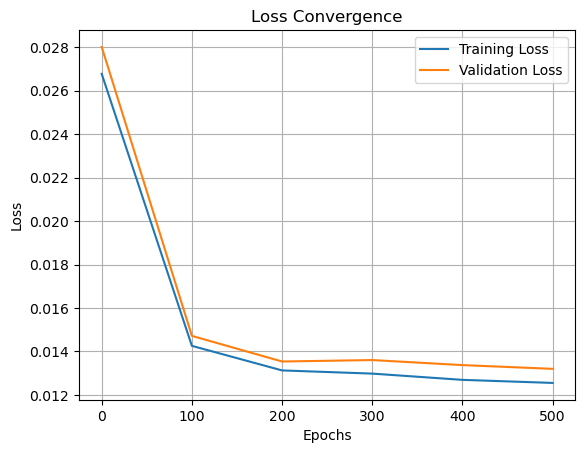

In [17]:
def vis_train_loss(train_loss_history, val_loss_history):
    epochs = range(0, n_epochs, 100) 
    plt.plot(epochs, train_loss_history, label='Training Loss')
    plt.plot(epochs, val_loss_history, label='Validation Loss') 
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Convergence')
    plt.legend()
    plt.grid()
    plt.show()

vis_train_loss(train_loss_history_5, val_loss_history_5)

### Computing the RMSE
---

To compute the root mean square error of the model's predictions, we can simply use `root_mean_squared_error` from scikit-learn.

We can compute the $ R^2 $ score in a similar manner.

Let's also plot the predictions that the LSTM model has made and compare them to the labelled data.

In [18]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
def pred_eval(model, X, y, lengths, train_d, test_d, lookback, target_col):
    model.eval()
    with torch.no_grad():
        train_preds = model(X, lengths)
        print("Training RMSE:",root_mean_squared_error(y.flatten().tolist(),train_preds.flatten().tolist()))
        print("Training R2:", r2_score(y.flatten().tolist(),train_preds.flatten().tolist()))
        X_test = []
        y_test = []
        lengths_test = []
        for count, (location_id, test_values, scaler) in enumerate(test_d):
            train_values = train_d[count][1]
            X_test.append(train_values[-lookback:])
            y_test.append(test_values[:,target_col])
            # Append the actual lengths (just like the training phase)
            lengths_test.append(len(train_values[-lookback:]))  
        X_test = torch.Tensor(np.array(X_test)) 
        y_test = torch.Tensor(np.array(y_test))
        lengths_test = torch.Tensor(lengths_test).long()
        test_preds = model(X_test,lengths_test)
        #print(y_test.flatten().tolist())
        #print(test_preds.flatten().tolist())
        print("Test RMSE:",root_mean_squared_error(y_test.flatten().tolist(),test_preds.flatten().tolist()))
        print("Test R2:", r2_score(y_test.flatten().tolist(),test_preds.flatten().tolist()))
        plt.figure(figsize=(10, 6))
        plt.plot(y_test.flatten().tolist(), label="Expected Value")
        plt.plot(test_preds.flatten().tolist(), label="Predicted Value")
        plt.grid()
        plt.legend(fontsize=10)
        plt.tight_layout()
        plt.show()

Training RMSE: 0.11262500832350078
Training R2: 0.539053571719478
Test RMSE: 0.15060196531076583
Test R2: -0.014040869776445586


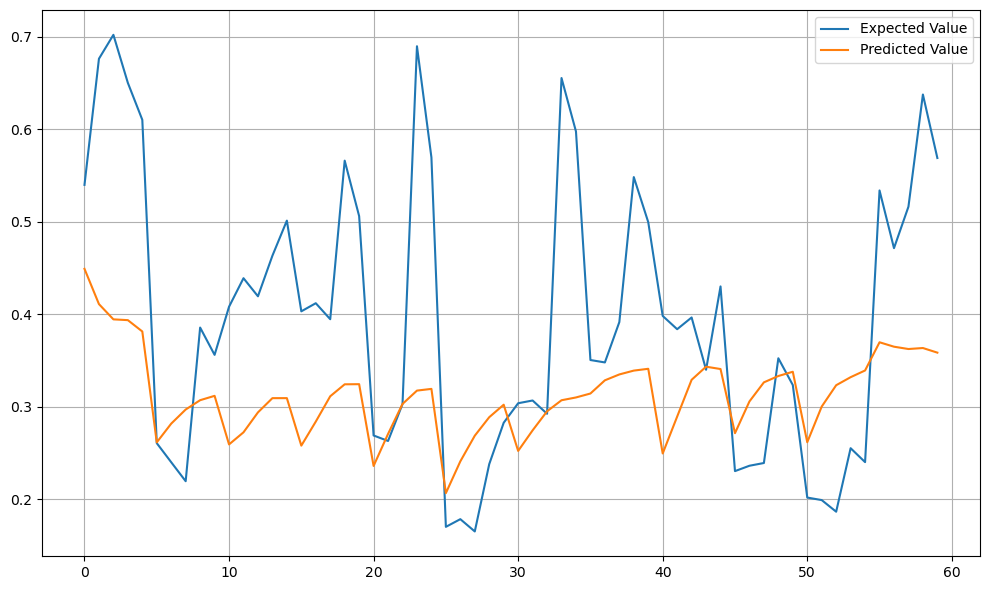

In [19]:
lookback = 10
target_col = 0
pred_eval(model_lstm_5, X_5, y_5, lengths_5, train_d_5, test_d_5, lookback, target_col)

From this plot, we can come to a conclusion: the model is incapable of accurately predicting the extreme values, but on average predicts in the correct ballpark. This may be due to a number of reasons: the model architecture, the data, or the fact that we are only making a prediction based on a single variable: the historical `MaxTemp`.

## Multivariate LSTM model
---

Instead of only relying on the `MaxTemp`, let's utilize a larger number of the input features that we have available. Repeat the process from before by selecting the features, creating the sequence, and training the model. We do not need to change the architecture of the LSTM network, as we can simply provide a different number of input features to the constructor.


In [24]:
import numpy as np
import torch
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_sequence

def create_sequences(sequence, lookback, forecast_horizon, target_col, pad_value=0.0):
    T, num_features = sequence.shape
    X, y, lengths = [], [], []

    if lookback > 0:
        # Fixed-length lookback with pre-padding
        pad_vector = np.zeros((lookback, num_features))

        for t in range(1, T - forecast_horizon + 1):
            context = sequence[:t]
            if len(context) > lookback:
                context = context[-lookback:]

            padded_context = pad_vector.copy()
            padded_context[-len(context):] = context

            X.append(padded_context)
            y.append(sequence[t:t + forecast_horizon, target_col])
            lengths.append(min(len(context), lookback))

        return np.array(X), np.array(y), lengths

    else:
        # Full history with left pre-padding (variable-length inputs)
        for t in range(1, T - forecast_horizon + 1):
            context = torch.tensor(sequence[:t], dtype=torch.float32)
            lengths.append(t)

            X.append(context)  # No manual padding
            y.append(torch.tensor(sequence[t:t + forecast_horizon, target_col], dtype=torch.float32))

        X_padded = pad_sequence(X, batch_first=True, padding_value=pad_value)
        y_tensor = torch.stack(y)

        return X_padded.numpy(), y_tensor.numpy(), lengths

Shape of input data after sequence creation: torch.Size([2220, 185, 8])
Shape of targets after sequence creation: torch.Size([2220, 5])
The model has 1,735 trainable parameters
Epoch 1: train loss 0.0287, val loss 0.0282
Epoch 101: train loss 0.0068, val loss 0.0079
Epoch 201: train loss 0.0044, val loss 0.0053
Epoch 301: train loss 0.0022, val loss 0.0025
Epoch 401: train loss 0.0015, val loss 0.0017
Epoch 501: train loss 0.0012, val loss 0.0013


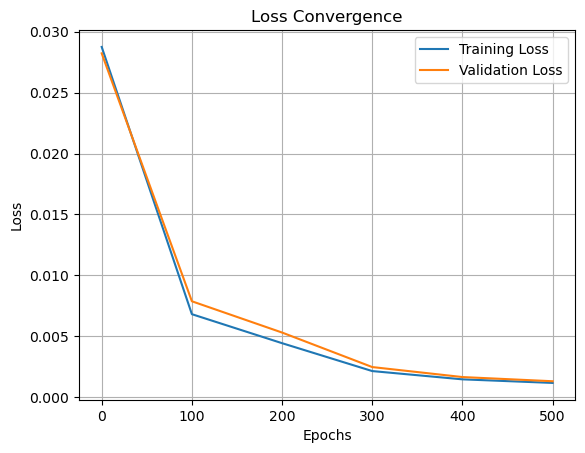

Training RMSE: 0.034891870409899085
Training R2: 0.9587239343519623
Test RMSE: 0.07455866435728428
Test R2: 0.8174176504987234


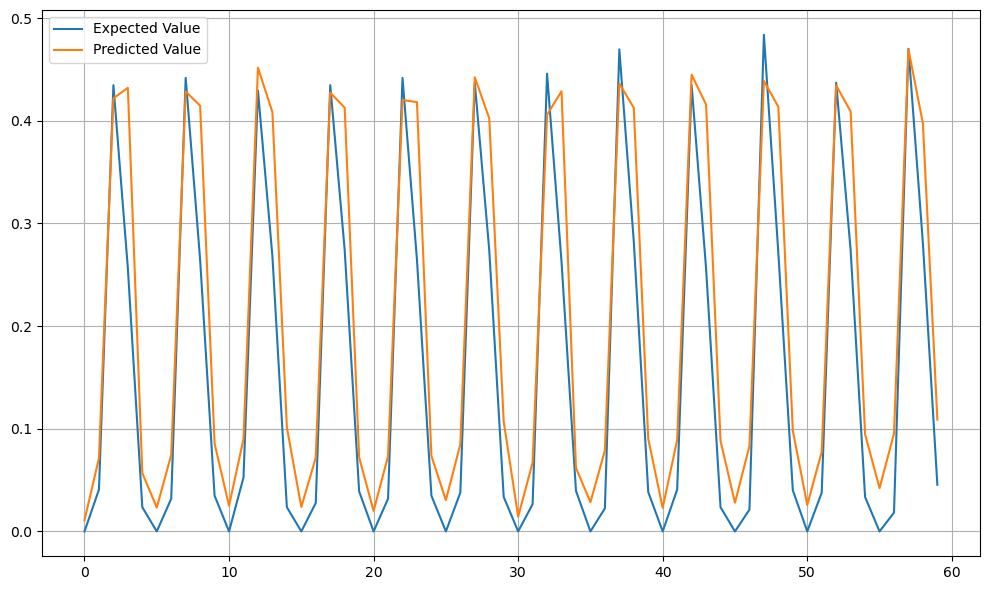

In [26]:
lookback = 0 # Means no restriction of lookback
target_col = 1
X_f, y_f,lengths_f, train_d_f, test_d_f = data_prep(df,['TSDM', '15D_AVG_DAILY_RAIN', 
                                                        '15D_AVG_MAX_TEMP', '15D_AVG_MIN_TEMP',
                                                        '15D_AVG_RH_TMAX', '15D_AVG_RH_TMIN', 
                                                        '15D_AVG_EVAP_SYN', '15D_AVG_RADIATION',],lookback,test_steps, target_col)

print("Shape of input data after sequence creation:", X_f.shape)
print("Shape of targets after sequence creation:", y_f.shape)

num_features = X_f.shape[2]
hidden_layer_size = 10
output_size = test_steps
n_epochs = 501
lr = 0.001
num_layers = 2
dropout_prob = 0.2
model_lstm_f = MyLSTMNet(num_features, hidden_layer_size, num_layers, output_size,dropout_prob)

train_loss_history_f,val_loss_history_f,model_lstm_f = train_predict_model(model_lstm_f, n_epochs, 
                                                                           lr, X_f, y_f, lengths_f, 
                                                                           validation_split=0.2)

vis_train_loss(train_loss_history_f, val_loss_history_f)

pred_eval(model_lstm_f, X_f, y_f, lengths_f, train_d_f, test_d_f, lookback, target_col)